# This code measures how fast it can draw a variable from Elasticsearch

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec

from elasticsearch import Elasticsearch
from elasticsearch.helpers import scan
from time import time

es = Elasticsearch(['atlas-kibana.mwt2.org:9200'],timeout=60)

## Select data format you would like to stream
options are data15_13tev, data15_13tev_aod, mc15_13tev, mc15_13tev_aod

In [2]:
my_index = "data15_13tev_aod"

### Select a percentage of events to read. 
e.g. toRead=2 will read 2% of all events

In [3]:
toRead=1

In [4]:
my_query = {
    "min_score": 1-(toRead/100),
    "fields" : ["AntiKt4EMTopoJetsAuxDyn.ActiveArea"],
    "query" : {
        "function_score" : {
            "random_score" : { "seed":"123" }
        }
    }
}

### actually streaming events

In [8]:
t0 = time()

scroll = scan(es, query=my_query, index=my_index, scroll='5m', timeout="5m", size=100)

ActiveArea=[]
count = 0
for res in scroll:
    if not count%1000: 
        print(count)
    if 'fields' in res:
        ActiveArea.extend(res['fields']['AntiKt4EMTopoJetsAuxDyn.ActiveArea'])
    count += 1
    
t1 = time()

print (count, 'events in %f seconds.' %(t1-t0), count/(t1-t0), "ev/s.")

0
259 events in 0.562991 seconds. 460.04256704937035 ev/s.


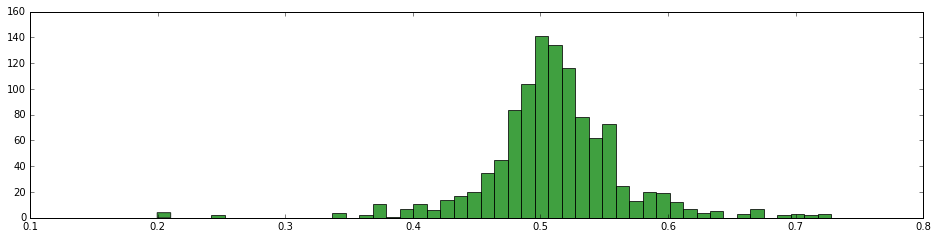

In [14]:
plt.figure(figsize=[16, 17])
gs = gridspec.GridSpec(4, 1)

ax0 = plt.subplot(gs[0])
ax0.hist(ActiveArea, 50, normed=0, facecolor='green', alpha=0.75)
#ax0.plot(Fthr.timestamp.tolist(), Fthr.throughput.tolist(), ls='-', marker='>', c='r', label=sS+'->'+dS)
#ax0.plot(Bthr.timestamp.tolist(), Bthr.throughput.tolist(), ls='-', marker='<', c='b', label=dS+'->'+sS)
#ax0.set_xlabel('time')
#ax0.set_ylabel('throughput [Gbps]')#,rotation='horizontal')
#ax0.xlim(xmin=0)
#ax0.legend()


#ax2 = plt.subplot(gs[1])
plt.show()